In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df_wnba = pd.read_csv("wnbadraft.csv")
df_wnba.head()

,overall_pick,year,team,player,former,college,years_played,games,win_shares,win_shares_40,minutes_played,points,total_rebounds,assists
0,1,2022,Atlanta Dream,Rhyne Howard,NaN,Kentucky,1,34.0,2.9,0.110,31.4,16.2,4.5,2.8
1,2,2022,Indiana Fever,NaLyssa Smith,NaN,Baylor,1,32.0,0.0,-0.001,30.7,13.5,7.9,1.4
2,3,2022,Washington Mystics,Shakira Austin,NaN,Ole Miss,1,36.0,3.1,0.160,21.6,8.7,6.5,0.9
3,4,2022,Indiana Fever,Emily Engstler,NaN,Louisville,1,35.0,0.4,0.024,18.2,5.2,5.2,1.5
4,5,2022,New York Liberty,Nyara Sabally,NaN,Oregon,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df_wnba.columns

Index(['overall_pick', 'year', 'team', 'player', 'former', 'college',
       'years_played', 'games', 'win_shares', 'win_shares_40',
       'minutes_played', 'points', 'total_rebounds', 'assists'],
      dtype='object')

In [43]:
df_wnba["overall_pick"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64], dtype=int64)

In [44]:
df_wnba.shape

(1064, 14)

In [45]:
df_wnba.drop(columns=['former'], inplace=True)

In [46]:
df_wnba

,overall_pick,year,team,player,college,years_played,games,win_shares,win_shares_40,minutes_played,points,total_rebounds,assists
0,1,2022,Atlanta Dream,Rhyne Howard,Kentucky,1,34.0,2.9,0.110,31.4,16.2,4.5,2.8
1,2,2022,Indiana Fever,NaLyssa Smith,Baylor,1,32.0,0.0,-0.001,30.7,13.5,7.9,1.4
2,3,2022,Washington Mystics,Shakira Austin,Ole Miss,1,36.0,3.1,0.160,21.6,8.7,6.5,0.9
3,4,2022,Indiana Fever,Emily Engstler,Louisville,1,35.0,0.4,0.024,18.2,5.2,5.2,1.5
4,5,2022,New York Liberty,Nyara Sabally,Oregon,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,28,1997,Utah Starzz,Kim Williams,DePaul,2,58.0,0.3,0.010,19.8,7.8,2.4,1.8
1060,29,1997,Cleveland Rockers,Anita Maxwell,New Mexico State,1,9.0,-0.1,-0.036,7.0,2.1,1.3,0.9
1061,30,1997,Los Angeles Sparks,Travesa Gant,Lamar,1,2.0,-0.1,-0.247,6.5,0.0,1.5,0.0
1062,31,1997,Sacramento Monarchs,Tajama Abraham,George Washington,2,40.0,-0.8,-0.070,11.7,3.5,1.9,0.3


In [47]:
df_wnba.isnull().sum()

overall_pick        0
year                0
team                0
player              2
college            86
years_played        0
games             334
win_shares        334
win_shares_40     335
minutes_played    334
points            334
total_rebounds    334
assists           334
dtype: int64

In [52]:
df_with_missing = df_wnba[df_wnba.isnull().any(axis=1)]
df_with_missing

,overall_pick,year,team,player,college,years_played,games,win_shares,win_shares_40,minutes_played,points,total_rebounds,assists
4,5,2022,New York Liberty,Nyara Sabally,Oregon,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,2022,Minnesota Lynx,Mya Hollingshed,Colorado,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,14,2022,Washington Mystics,Christyn Williams,UConn,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,22,2022,Minnesota Lynx,Kayla Jones,NC State,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,24,2022,Connecticut Sun,Jordan Lewis,Baylor,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,35,1998,Los Angeles Sparks,Erika Keinast,UC Santa Barbara,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1027,36,1998,Cleveland Rockers,Tammye Jenkins,Georgia,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1029,38,1998,Phoenix Mercury,Karen Wilkins,Howard University,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1035,4,1997,Cleveland Rockers,Eva Nemcova,NaN,5,111.0,10.4,0.122,30.6,11.7,3.5,1.9


In [53]:
df_with_missing.isnull().sum()

overall_pick        0
year                0
team                0
player              2
college            86
years_played        0
games             334
win_shares        334
win_shares_40     335
minutes_played    334
points            334
total_rebounds    334
assists           334
dtype: int64

In [54]:
df_no_college = df_with_missing[df_with_missing['college'].isnull()]
df_no_college

,overall_pick,year,team,player,college,years_played,games,win_shares,win_shares_40,minutes_played,points,total_rebounds,assists
28,29,2022,New York Liberty,Sika Koné,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,33,2022,Seattle Storm,Jade Melbourne,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,2,2021,Dallas Wings,Awak Kuier,NaN,2,49.0,0.5,0.038,11.4,2.6,2.5,0.8
43,8,2021,Chicago Sky,Shyla Heal,NaN,1,4.0,-0.3,-0.410,7.8,2.0,0.8,0.8
47,12,2021,Las Vegas Aces,Iliana Rupert,NaN,1,17.0,0.5,0.096,13.1,3.8,2.3,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,14,1998,Detroit Shock,Rachael Sporn,NaN,3,71.0,1.9,0.066,16.1,4.0,3.1,1.1
1009,18,1998,Phoenix Mercury,Andrea Kuklova,NaN,2,34.0,-0.1,-0.008,10.4,2.9,1.1,0.9
1021,30,1998,Houston Comets,Amaya Valdemoro,NaN,3,55.0,0.8,0.100,5.9,2.3,0.8,0.5
1025,34,1998,Detroit Shock,Sandy Brondello,NaN,5,155.0,12.4,0.108,29.6,11.4,1.9,2.3


In [71]:
df_wnba_pick1 = df_wnba[df_wnba['overall_pick'] == 1]
print(df_wnba_pick1.shape)
print(df_wnba_pick1.isnull().sum())
print(df_wnba_pick1.describe())

(26, 13)
overall_pick      0
year              0
team              0
player            0
college           3
years_played      0
games             0
win_shares        0
win_shares_40     0
minutes_played    0
points            0
total_rebounds    0
assists           0
dtype: int64
       overall_pick         year  years_played       games  win_shares  \
count          26.0    26.000000     26.000000   26.000000   26.000000   
mean            1.0  2009.500000      9.384615  266.384615   33.026923   
std             0.0     7.648529      4.875054  139.683665   21.979673   
min             1.0  1997.000000      1.000000   34.000000    0.500000   
25%             1.0  2003.250000      6.000000  158.500000   15.325000   
50%             1.0  2009.500000      9.000000  270.500000   30.000000   
75%             1.0  2015.750000     12.000000  322.250000   50.675000   
max             1.0  2022.000000     19.000000  580.000000   73.000000   

       win_shares_40  minutes_played     points  to

In [72]:
## Stats para las 2das elecciones del WNBA draft
df_wnba_pick2 = df_wnba[df_wnba['overall_pick'] == 2]
print(df_wnba_pick2.shape)
print(df_wnba_pick2.isnull().sum())
print(df_wnba_pick2.describe())

(26, 13)
overall_pick      0
year              0
team              0
player            0
college           2
years_played      0
games             0
win_shares        0
win_shares_40     0
minutes_played    0
points            0
total_rebounds    0
assists           0
dtype: int64
       overall_pick         year  years_played       games  win_shares  \
count          26.0    26.000000     26.000000   26.000000   26.000000   
mean            2.0  2009.500000      7.846154  223.038462   16.684615   
std             0.0     7.648529      4.406289  142.427099   19.850354   
min             2.0  1997.000000      1.000000   32.000000    0.000000   
25%             2.0  2003.250000      5.000000  105.250000    2.325000   
50%             2.0  2009.500000      7.000000  187.000000    8.900000   
75%             2.0  2015.750000     10.750000  319.750000   25.575000   
max             2.0  2022.000000     15.000000  479.000000   73.500000   

       win_shares_40  minutes_played     points  to

In [73]:
## Stats para las 3ras elecciones del WNBA draft
df_wnba_pick3 = df_wnba[df_wnba['overall_pick'] == 3]
print(df_wnba_pick3.shape)
print(df_wnba_pick3.isnull().sum())
print(df_wnba_pick3.describe())

(26, 13)
overall_pick      0
year              0
team              0
player            0
college           0
years_played      0
games             0
win_shares        0
win_shares_40     0
minutes_played    0
points            0
total_rebounds    0
assists           0
dtype: int64
       overall_pick         year  years_played       games  win_shares  \
count          26.0    26.000000     26.000000   26.000000   26.000000   
mean            3.0  2009.500000      6.961538  201.923077   15.303846   
std             0.0     7.648529      3.841674  123.614214   19.649763   
min             3.0  1997.000000      1.000000   15.000000   -1.300000   
25%             3.0  2003.250000      5.000000  122.000000    2.350000   
50%             3.0  2009.500000      6.000000  162.000000    9.100000   
75%             3.0  2015.750000      9.000000  282.000000   24.500000   
max             3.0  2022.000000     15.000000  457.000000   93.700000   

       win_shares_40  minutes_played     points  to

## Análisis sobre las jugadoras Pick 1

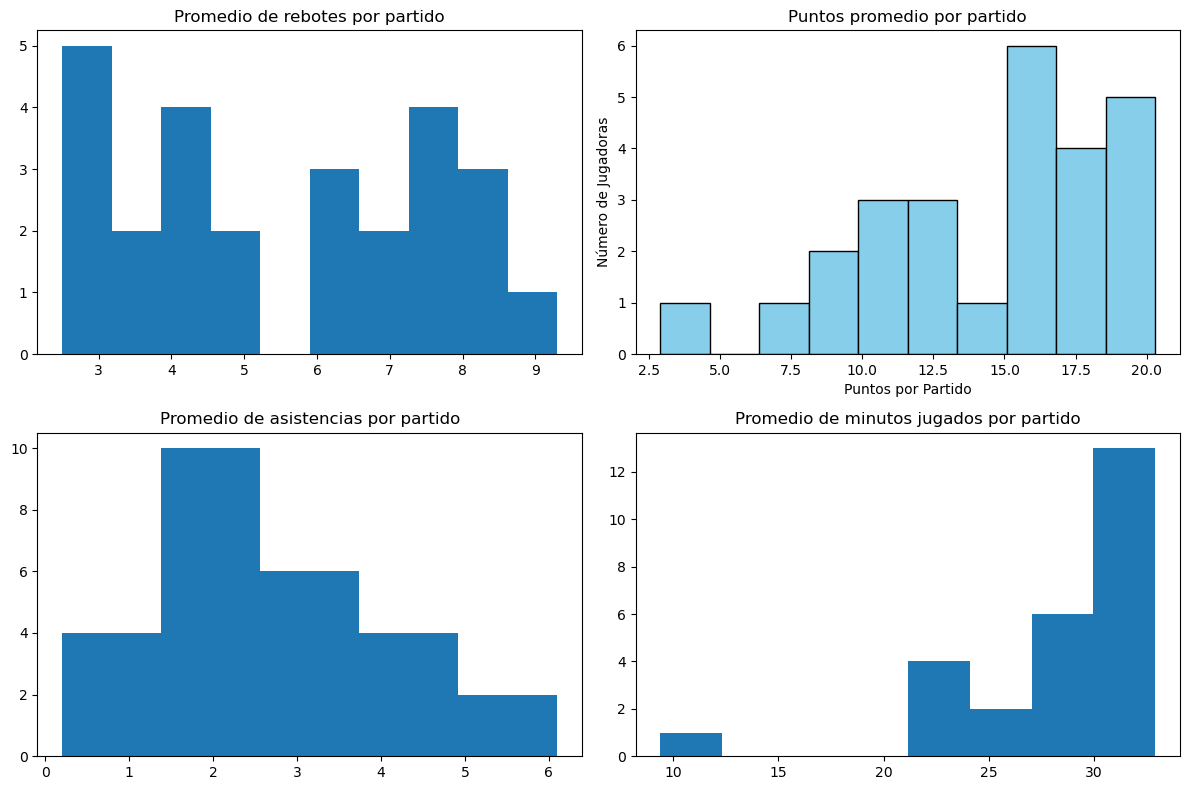

In [126]:
## Histogramas de la distribución de puntos, minutos jugados, asistencias y rebotes promedio por partido de jugadoras Pick 01
# Definir el tamaño total de la figura
plt.figure(figsize=(12, 8))

# Histograma 'total_rebounds'
plt.subplot(2, 2, 1)  # 2 filas, 2 columnas, gráfico en la posición 1
plt.hist(df_wnba_pick1['total_rebounds'], bins=10)
plt.title('Promedio de rebotes por partido')
plt.grid(False)

# Histograma 'points'
plt.subplot(2, 2, 2)  # 2 filas, 2 columnas, gráfico en la posición 2
plt.hist(df_wnba_pick1['points'], bins=10, color='skyblue', edgecolor='black')
plt.title('Puntos promedio por partido')
plt.xlabel('Puntos por Partido')
plt.ylabel('Número de Jugadoras')
plt.grid(False)

# Histograma 'assists'
plt.subplot(2, 2, 3)  # 2 filas, 2 columnas, gráfico en la posición 3
plt.hist(df_wnba_pick1['assists'], bins=5)
plt.title('Promedio de asistencias por partido')
plt.grid(False)

# Histograma 'minutes_played'
plt.subplot(2, 2, 4)  # 2 filas, 2 columnas, gráfico en la posición 4
plt.hist(df_wnba_pick1['minutes_played'], bins=8)
plt.title('Promedio de minutos jugados por partido')
plt.grid(False)

# Ajustar los espacios entre los gráficos
plt.tight_layout()

# Mostrar todos los gráficos en una sola figura
plt.show()



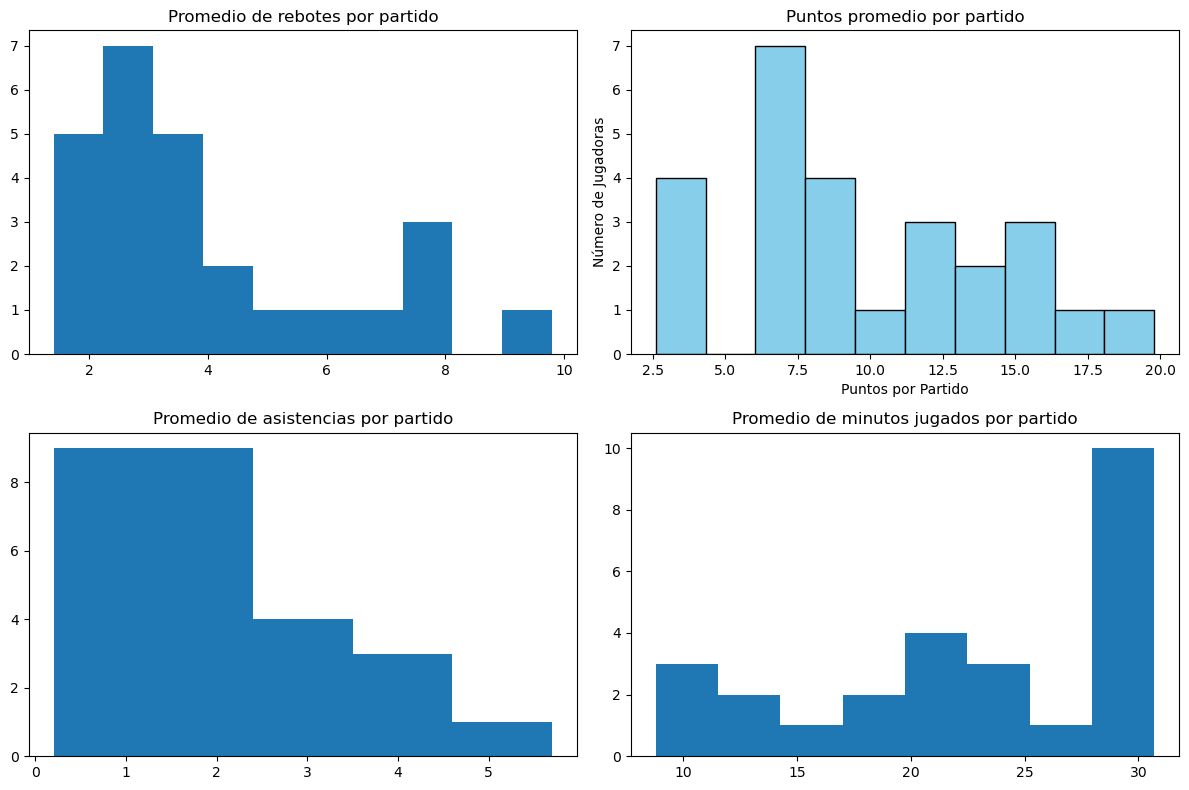

In [127]:
## Histogramas de la distribución de puntos, minutos jugados, asistencias y rebotes promedio por partido de jugadoras Pick 02
# Definir el tamaño total de la figura
plt.figure(figsize=(12, 8))

# Histograma 'total_rebounds'
plt.subplot(2, 2, 1)  # 2 filas, 2 columnas, gráfico en la posición 1
plt.hist(df_wnba_pick2['total_rebounds'], bins=10)
plt.title('Promedio de rebotes por partido')
plt.grid(False)

# Histograma 'points'
plt.subplot(2, 2, 2)  # 2 filas, 2 columnas, gráfico en la posición 2
plt.hist(df_wnba_pick2['points'], bins=10, color='skyblue', edgecolor='black')
plt.title('Puntos promedio por partido')
plt.xlabel('Puntos por Partido')
plt.ylabel('Número de Jugadoras')
plt.grid(False)

# Histograma 'assists'
plt.subplot(2, 2, 3)  # 2 filas, 2 columnas, gráfico en la posición 3
plt.hist(df_wnba_pick2['assists'], bins=5)
plt.title('Promedio de asistencias por partido')
plt.grid(False)

# Histograma 'minutes_played'
plt.subplot(2, 2, 4)  # 2 filas, 2 columnas, gráfico en la posición 4
plt.hist(df_wnba_pick2['minutes_played'], bins=8)
plt.title('Promedio de minutos jugados por partido')
plt.grid(False)

# Ajustar los espacios entre los gráficos
plt.tight_layout()

# Mostrar todos los gráficos en una sola figura
plt.show()

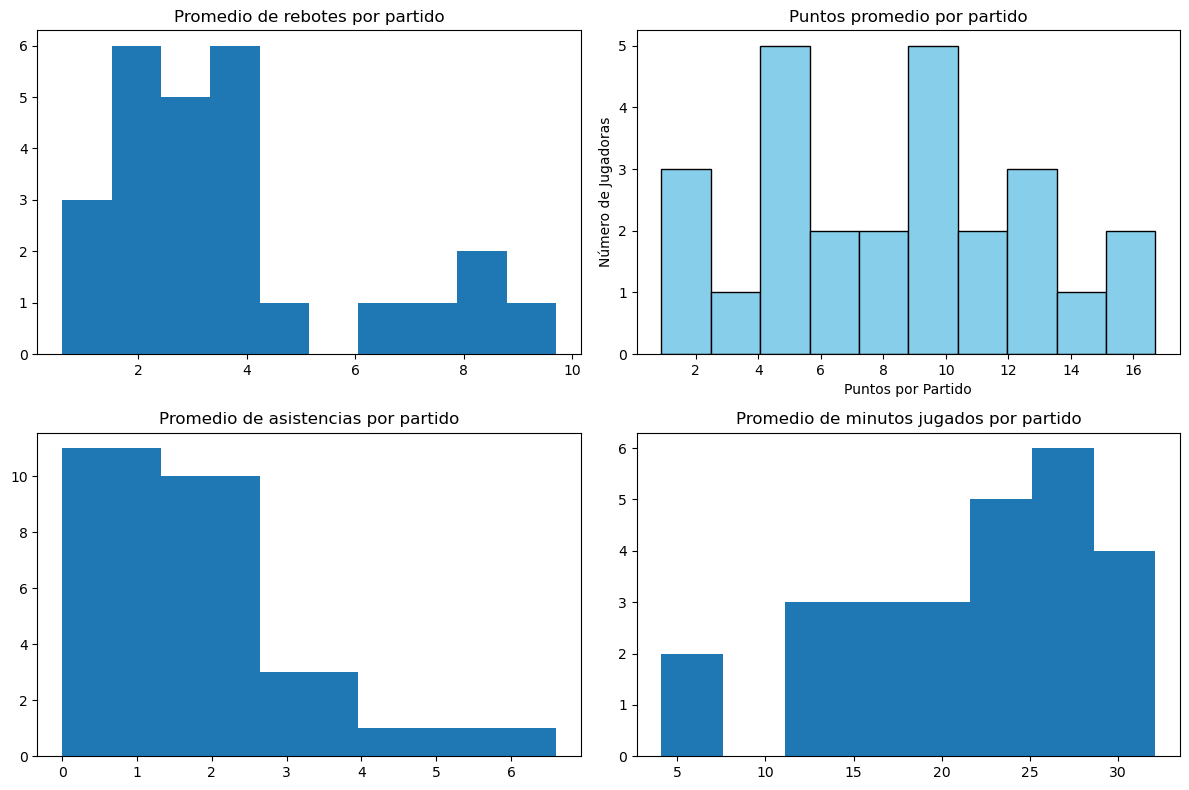

In [128]:
## Histogramas de la distribución de puntos, minutos jugados, asistencias y rebotes promedio por partido de jugadoras Pick 03
# Definir el tamaño total de la figura
plt.figure(figsize=(12, 8))

# Histograma 'total_rebounds'
plt.subplot(2, 2, 1)  # 2 filas, 2 columnas, gráfico en la posición 1
plt.hist(df_wnba_pick3['total_rebounds'], bins=10)
plt.title('Promedio de rebotes por partido')
plt.grid(False)

# Histograma 'points'
plt.subplot(2, 2, 2)  # 2 filas, 2 columnas, gráfico en la posición 2
plt.hist(df_wnba_pick3['points'], bins=10, color='skyblue', edgecolor='black')
plt.title('Puntos promedio por partido')
plt.xlabel('Puntos por Partido')
plt.ylabel('Número de Jugadoras')
plt.grid(False)

# Histograma 'assists'
plt.subplot(2, 2, 3)  # 2 filas, 2 columnas, gráfico en la posición 3
plt.hist(df_wnba_pick3['assists'], bins=5)
plt.title('Promedio de asistencias por partido')
plt.grid(False)

# Histograma 'minutes_played'
plt.subplot(2, 2, 4)  # 2 filas, 2 columnas, gráfico en la posición 4
plt.hist(df_wnba_pick3['minutes_played'], bins=8)
plt.title('Promedio de minutos jugados por partido')
plt.grid(False)

# Ajustar los espacios entre los gráficos
plt.tight_layout()

# Mostrar todos los gráficos en una sola figura
plt.show()

## Comparación de los puntos promedio por partido de las jugadoras Pick 01, 02, 03

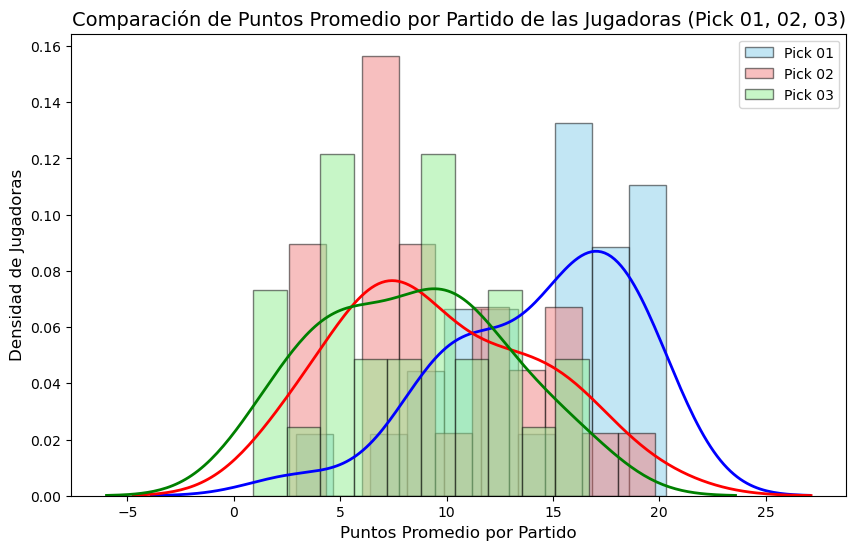

In [171]:
# Crear una figura
plt.figure(figsize=(10, 6))

# Histogramas normalizados para mejor comparación
plt.hist(df_wnba_pick1['points'], bins=10, color='skyblue', edgecolor='black', alpha=0.5, label='Pick 01', density=True)
plt.hist(df_wnba_pick2['points'], bins=10, color='lightcoral', edgecolor='black', alpha=0.5, label='Pick 02', density=True)
plt.hist(df_wnba_pick3['points'], bins=10, color='lightgreen', edgecolor='black', alpha=0.5, label='Pick 03', density=True)

# Añadir gráficos de densidad para suavizar la visualización
sns.kdeplot(df_wnba_pick1['points'], color='blue', linewidth=2, bw_adjust= 1)
sns.kdeplot(df_wnba_pick2['points'], color='red', linewidth=2, bw_adjust= 1)
sns.kdeplot(df_wnba_pick3['points'], color='green', linewidth=2, bw_adjust= 1)

# Títulos y etiquetas
plt.title('Comparación de Puntos Promedio por Partido de las Jugadoras (Pick 01, 02, 03)', fontsize=14)
plt.xlabel('Puntos Promedio por Partido', fontsize=12)
plt.ylabel('Densidad de Jugadoras', fontsize=12)

# Añadir la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


## Comparación de los rebotes promedio por partido de las jugadoras Pick 01, 02, 03

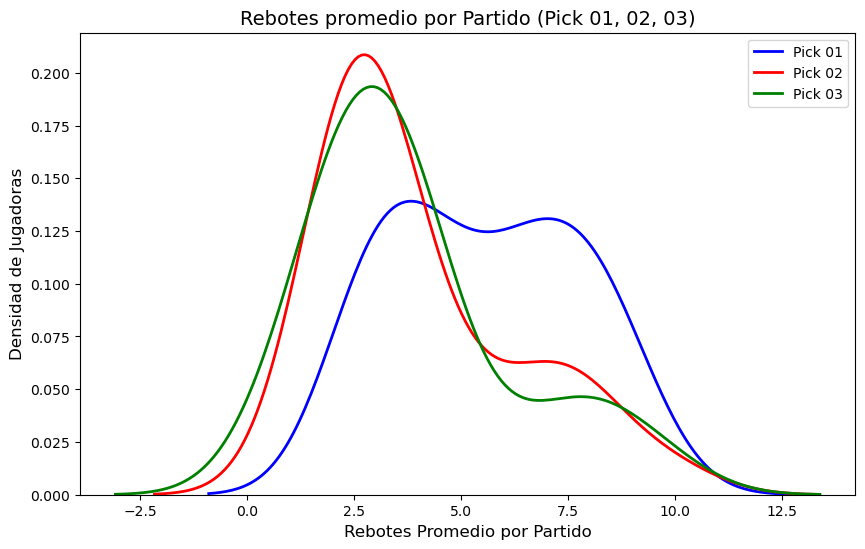

In [177]:
# Crear una figura
plt.figure(figsize=(10, 6))

sns.kdeplot(df_wnba_pick1['total_rebounds'], color='blue', linewidth=2, label='Pick 01', bw_adjust=1)
sns.kdeplot(df_wnba_pick2['total_rebounds'], color='red', linewidth=2, label='Pick 02', bw_adjust=1) 
sns.kdeplot(df_wnba_pick3['total_rebounds'], color='green', linewidth=2, label='Pick 03', bw_adjust= 1)

# Títulos y etiquetas
plt.title('Rebotes promedio por Partido (Pick 01, 02, 03)', fontsize=14)
plt.xlabel('Rebotes Promedio por Partido', fontsize=12)
plt.ylabel('Densidad de Jugadoras', fontsize=12)

plt.legend()
plt.show()

## Comparación de los asistencias promedio por partido de las jugadoras Pick 01, 02, 03

Text(0, 0.5, 'Densidad de Jugadoras')

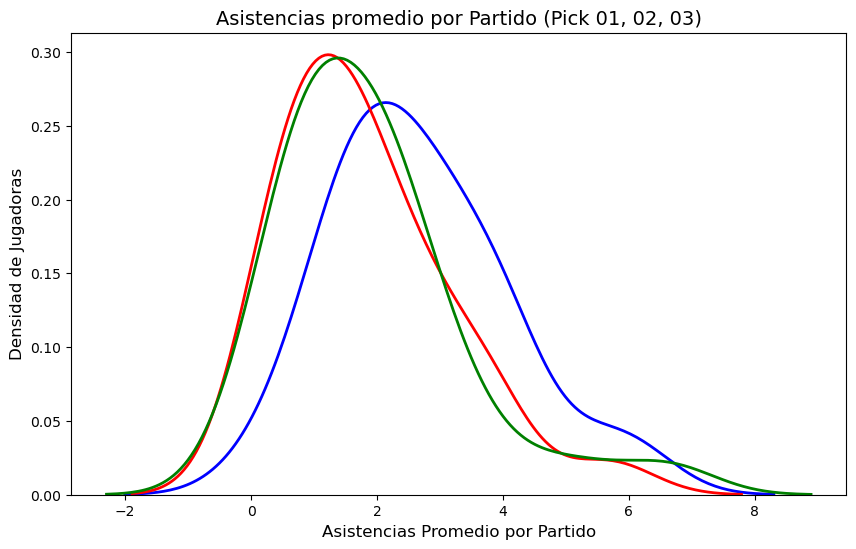

In [169]:
# Crear una figura
plt.figure(figsize=(10, 6))

sns.kdeplot(df_wnba_pick1['assists'], color='blue', linewidth=2, label='Pick 01', bw_adjust=1)
sns.kdeplot(df_wnba_pick2['assists'], color='red', linewidth=2, label='Pick 02', bw_adjust=1) 
sns.kdeplot(df_wnba_pick3['assists'], color='green', linewidth=2, label='Pick 03', bw_adjust= 1)

# Títulos y etiquetas
plt.title('Asistencias promedio por Partido (Pick 01, 02, 03)', fontsize=14)
plt.xlabel('Asistencias Promedio por Partido', fontsize=12)
plt.ylabel('Densidad de Jugadoras', fontsize=12)

## Comparación de los minutos promedio de juego por partido de las jugadoras Pick 01, 02, 03

Text(0, 0.5, 'Densidad de Jugadoras')

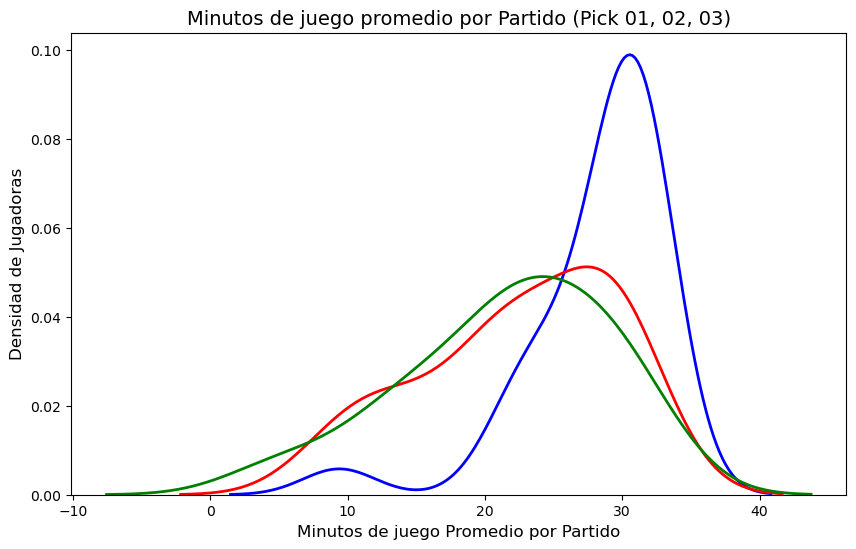

In [172]:
# Crear una figura
plt.figure(figsize=(10, 6))

sns.kdeplot(df_wnba_pick1['minutes_played'], color='blue', linewidth=2, label='Pick 01', bw_adjust=1)
sns.kdeplot(df_wnba_pick2['minutes_played'], color='red', linewidth=2, label='Pick 02', bw_adjust=1) 
sns.kdeplot(df_wnba_pick3['minutes_played'], color='green', linewidth=2, label='Pick 03', bw_adjust= 1)

# Títulos y etiquetas
plt.title('Minutos de juego promedio por Partido (Pick 01, 02, 03)', fontsize=14)
plt.xlabel('Minutos de juego Promedio por Partido', fontsize=12)
plt.ylabel('Densidad de Jugadoras', fontsize=12)

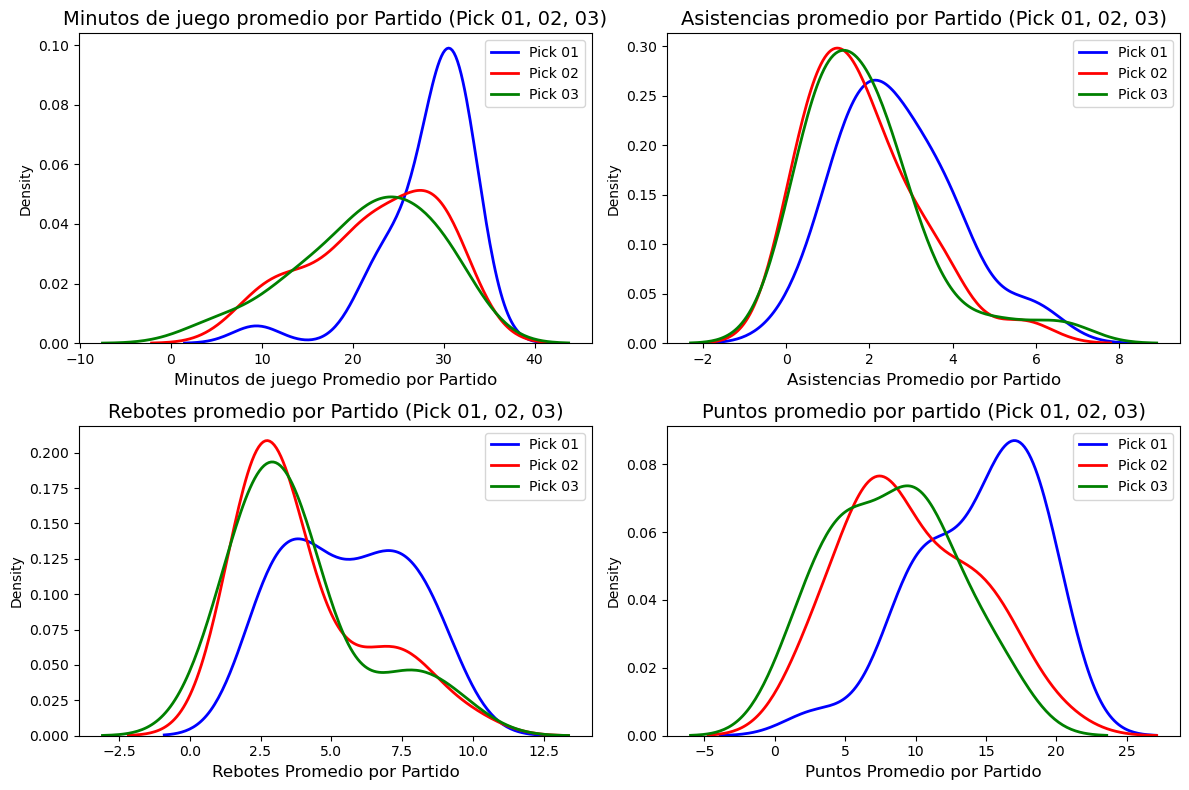

In [182]:
## Histogramas de la distribución de puntos, minutos jugados, asistencias y rebotes promedio por partido de jugadoras Pick 03
# Definir el tamaño total de la figura
plt.figure(figsize=(12, 8))

# Histograma 'Minutos de juego'
plt.subplot(2, 2, 1)  # 2 filas, 2 columnas, gráfico en la posición 1
sns.kdeplot(df_wnba_pick1['minutes_played'], color='blue', linewidth=2, label='Pick 01', bw_adjust=1)
sns.kdeplot(df_wnba_pick2['minutes_played'], color='red', linewidth=2, label='Pick 02', bw_adjust=1) 
sns.kdeplot(df_wnba_pick3['minutes_played'], color='green', linewidth=2, label='Pick 03', bw_adjust= 1)
plt.title('Minutos de juego promedio por Partido (Pick 01, 02, 03)', fontsize=14)
plt.xlabel('Minutos de juego Promedio por Partido', fontsize=12)
plt.legend()

# Histograma 'Asistencias'
plt.subplot(2, 2, 2)  # 2 filas, 2 columnas, gráfico en la posición 2
sns.kdeplot(df_wnba_pick1['assists'], color='blue', linewidth=2, label='Pick 01', bw_adjust=1)
sns.kdeplot(df_wnba_pick2['assists'], color='red', linewidth=2, label='Pick 02', bw_adjust=1) 
sns.kdeplot(df_wnba_pick3['assists'], color='green', linewidth=2, label='Pick 03', bw_adjust= 1)
plt.title('Asistencias promedio por Partido (Pick 01, 02, 03)', fontsize=14)
plt.xlabel('Asistencias Promedio por Partido', fontsize=12)
plt.legend()

# Histograma 'Rebotes'
plt.subplot(2, 2, 3)  # 2 filas, 2 columnas, gráfico en la posición 3
sns.kdeplot(df_wnba_pick1['total_rebounds'], color='blue', linewidth=2, label='Pick 01', bw_adjust=1)
sns.kdeplot(df_wnba_pick2['total_rebounds'], color='red', linewidth=2, label='Pick 02', bw_adjust=1) 
sns.kdeplot(df_wnba_pick3['total_rebounds'], color='green', linewidth=2, label='Pick 03', bw_adjust= 1)
plt.title('Rebotes promedio por Partido (Pick 01, 02, 03)', fontsize=14)
plt.xlabel('Rebotes Promedio por Partido', fontsize=12)
plt.legend()

# Histograma 'Puntos'
plt.subplot(2, 2, 4)  # 2 filas, 2 columnas, gráfico en la posición 4
sns.kdeplot(df_wnba_pick1['points'], color='blue', linewidth=2, label='Pick 01', bw_adjust= 1)
sns.kdeplot(df_wnba_pick2['points'], color='red', linewidth=2, label='Pick 02', bw_adjust= 1)
sns.kdeplot(df_wnba_pick3['points'], color='green', linewidth=2, label='Pick 03', bw_adjust= 1)
plt.title('Puntos promedio por partido (Pick 01, 02, 03)', fontsize=14)
plt.xlabel('Puntos Promedio por Partido', fontsize=12)
plt.legend()

# Ajustar los espacios entre los gráficos
plt.tight_layout()

# Mostrar todos los gráficos en una sola figura
plt.show()